In [3]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import warnings
import plotly.express as px
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus=False)
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data_dummies.csv')
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Name', 'Location', 'Price', 'Year',
       'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Mileage_new', 'Brand',
       'Name_new', 'Brand_new', 'location_label'],
      dtype='object')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
from scipy.stats import bartlett
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

In [6]:
crosstab = pd.crosstab(df['Location'], df['Fuel_Type'], normalize = True)


In [11]:
crosstab

Fuel_Type,Diesel,Others
Location,,
Ahmedabad,0.023302,0.014213
Bangalore,0.036027,0.022476
Chennai,0.048256,0.032557
Coimbatore,0.061147,0.047265
Delhi,0.051727,0.041481
Hyderabad,0.083953,0.037019
Jaipur,0.038506,0.029747
Kochi,0.051066,0.059329
Kolkata,0.043133,0.046108


In [12]:
df['Year'].value_counts()

Year
2007_2012    1823
2014_2016    1524
2013_2014    1458
2017_2019    1074
1998_2006     172
Name: count, dtype: int64

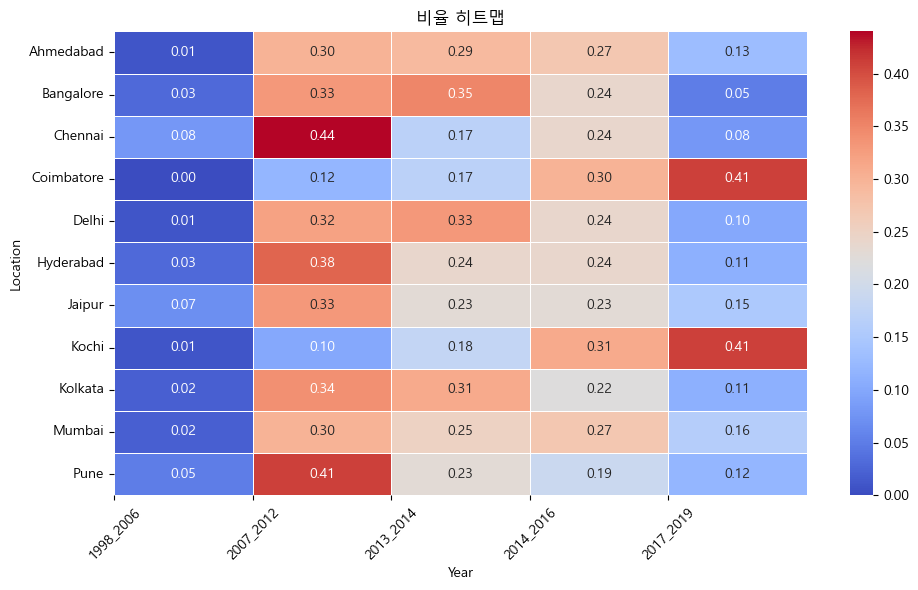

In [13]:
df_cross1 = pd.crosstab(df['Location'], df['Year'])
df_cross1['sum'] = df_cross1.sum(axis = 1)

df_cross1['1998_2006'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['2007_2012'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)
df_cross1['2013_2014'] = round(df_cross1.iloc[:,2] / df_cross1['sum'],2)
df_cross1['2014_2016'] = round(df_cross1.iloc[:,3] / df_cross1['sum'],2)
df_cross1['2017_2019'] = round(df_cross1.iloc[:,4] / df_cross1['sum'],2)

df_cross1[['1998_2006', '2007_2012', '2013_2014','2014_2016', '2017_2019']]
df_cross1
# 비율 열만 선택
heatmap_data = df_cross1[['1998_2006', '2007_2012', '2013_2014', '2014_2016', '2017_2019']]

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('비율 히트맵')
plt.xlabel('Year')
plt.ylabel('Location')
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=heatmap_data.columns, rotation=45)
plt.tight_layout()
plt.show()

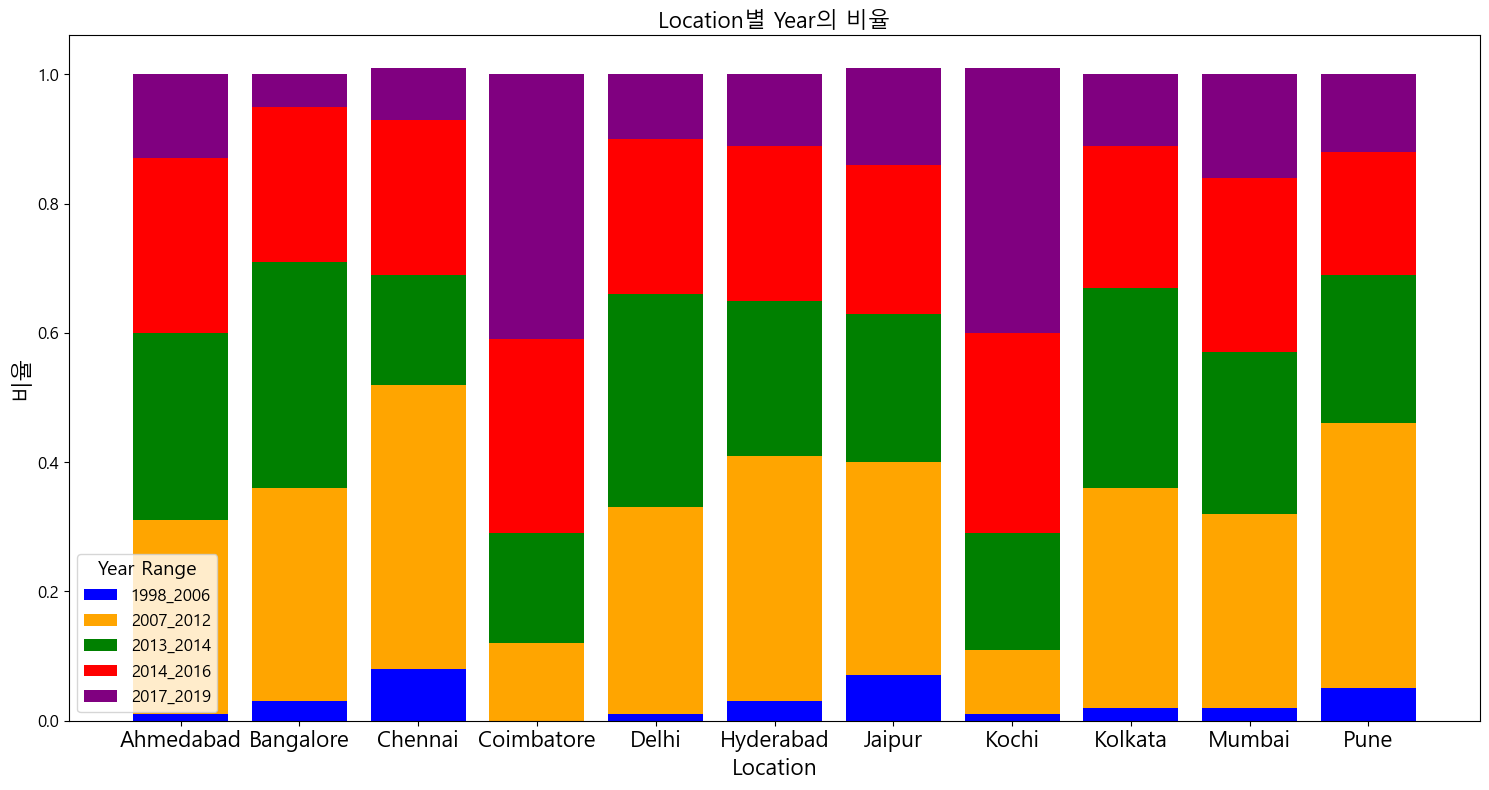

In [127]:
df_cross1 = pd.crosstab(df['Location'], df['Year'])
df_cross1['sum'] = df_cross1.sum(axis = 1)

df_cross1['1998_2006'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['2007_2012'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)
df_cross1['2013_2014'] = round(df_cross1.iloc[:,2] / df_cross1['sum'],2)
df_cross1['2014_2016'] = round(df_cross1.iloc[:,3] / df_cross1['sum'],2)
df_cross1['2017_2019'] = round(df_cross1.iloc[:,4] / df_cross1['sum'],2)

df_cross1[['1998_2006', '2007_2012', '2013_2014','2014_2016', '2017_2019']]
df_cross1
# 누적 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(15, 8))  # 더 넓은 그래프를 위한 크기 조정

# 막대 하단 위치 초기화
bottoms = [0] * len(df_cross1)
colors = ['blue', 'orange', 'green', 'red', 'purple']  # 5가지 색상으로 확장

# 각 비율을 누적 막대로 그리기
for i, column in enumerate(['1998_2006', '2007_2012', '2013_2014', '2014_2016', '2017_2019']):
    ax.bar(df_cross1.index, df_cross1[column], bottom=bottoms, label=column, color=colors[i])
    bottoms = [b + h for b, h in zip(bottoms, df_cross1[column])]

# 그래프 설정
ax.set_xlabel('Location', fontsize=16)  # X축 라벨 크기 조정
ax.set_ylabel('비율', fontsize=16)       # Y축 라벨 크기 조정
ax.set_title('Location별 Year의 비율', fontsize=16)  # 제목 크기 조정
ax.legend(title='Year Range', fontsize=12, title_fontsize=14)  # 범례 제목 및 크기 조정

# 눈금 레이블 크기 조정
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=12)

# 레이아웃 최적화
plt.tight_layout()
plt.show()

In [14]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel    3251
Others    2800
Name: count, dtype: int64

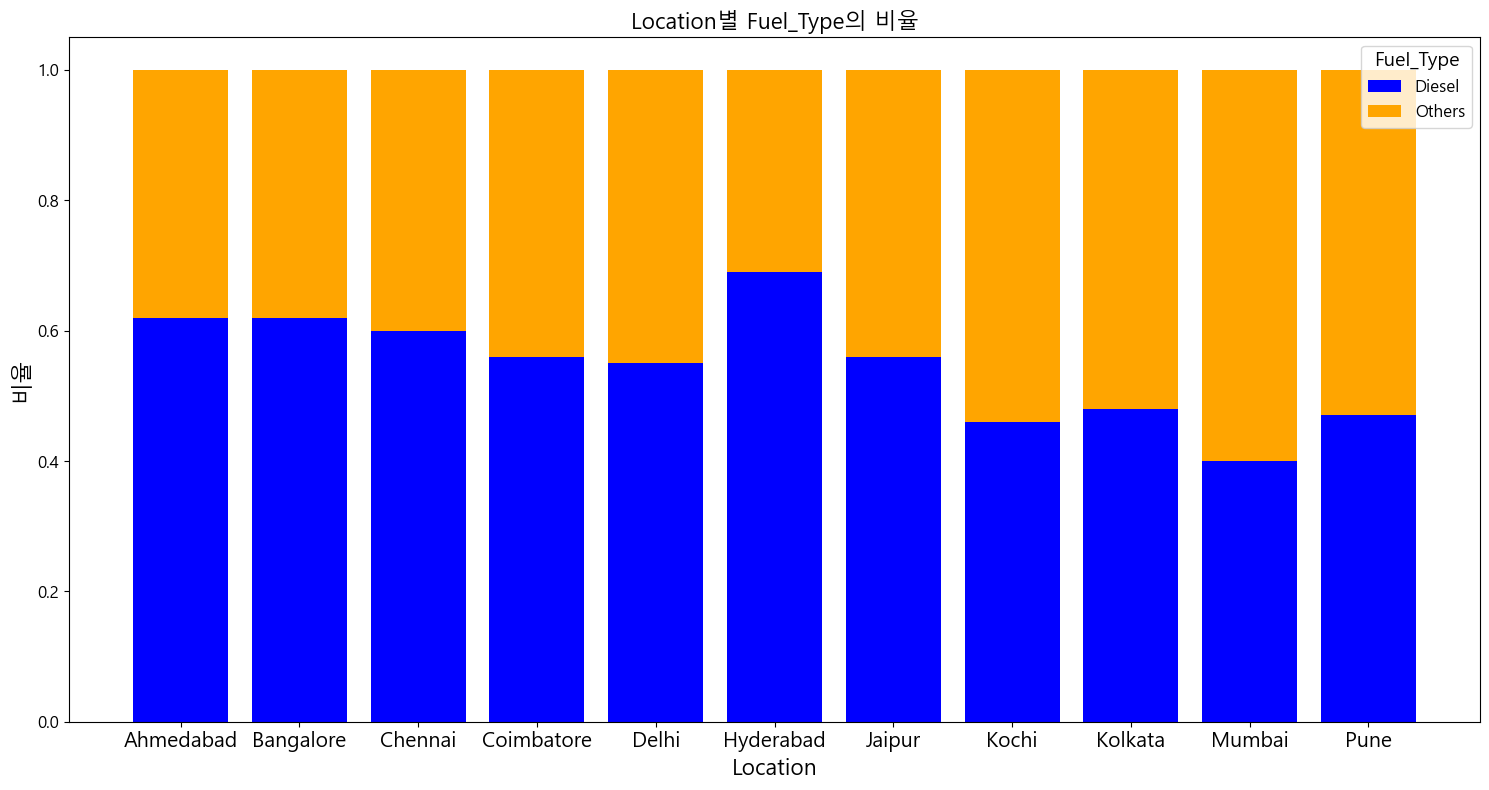

In [111]:
df_cross1 = pd.crosstab(df['Location'], df['Fuel_Type'])
df_cross1['sum'] = df_cross1.sum(axis = 1)

df_cross1['Diesel'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['Others'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)


df_cross1[['Diesel', 'Others']]
df_cross1
# 누적 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(15, 8))  # 더 넓은 그래프를 위한 크기 조정

# 막대 하단 위치 초기화
bottoms = [0] * len(df_cross1)
colors = ['blue', 'orange', 'green', 'red', 'purple']  # 5가지 색상으로 확장

# 각 비율을 누적 막대로 그리기
for i, column in enumerate(['Diesel', 'Others']):
    ax.bar(df_cross1.index, df_cross1[column], bottom=bottoms, label=column, color=colors[i])
    bottoms = [b + h for b, h in zip(bottoms, df_cross1[column])]

# 그래프 설정
ax.set_xlabel('Location', fontsize=16)  # X축 라벨 크기 조정
ax.set_ylabel('비율', fontsize=16)       # Y축 라벨 크기 조정
ax.set_title('Location별 Fuel_Type의 비율', fontsize=16)  # 제목 크기 조정
ax.legend(title='Fuel_Type', fontsize=12, title_fontsize=14)  # 범례 제목 및 크기 조정

# 눈금 레이블 크기 조정
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=12)

# 레이아웃 최적화
plt.tight_layout()
plt.show()

In [16]:
df['Transmission'].value_counts()

Transmission
Manual       4308
Automatic    1743
Name: count, dtype: int64

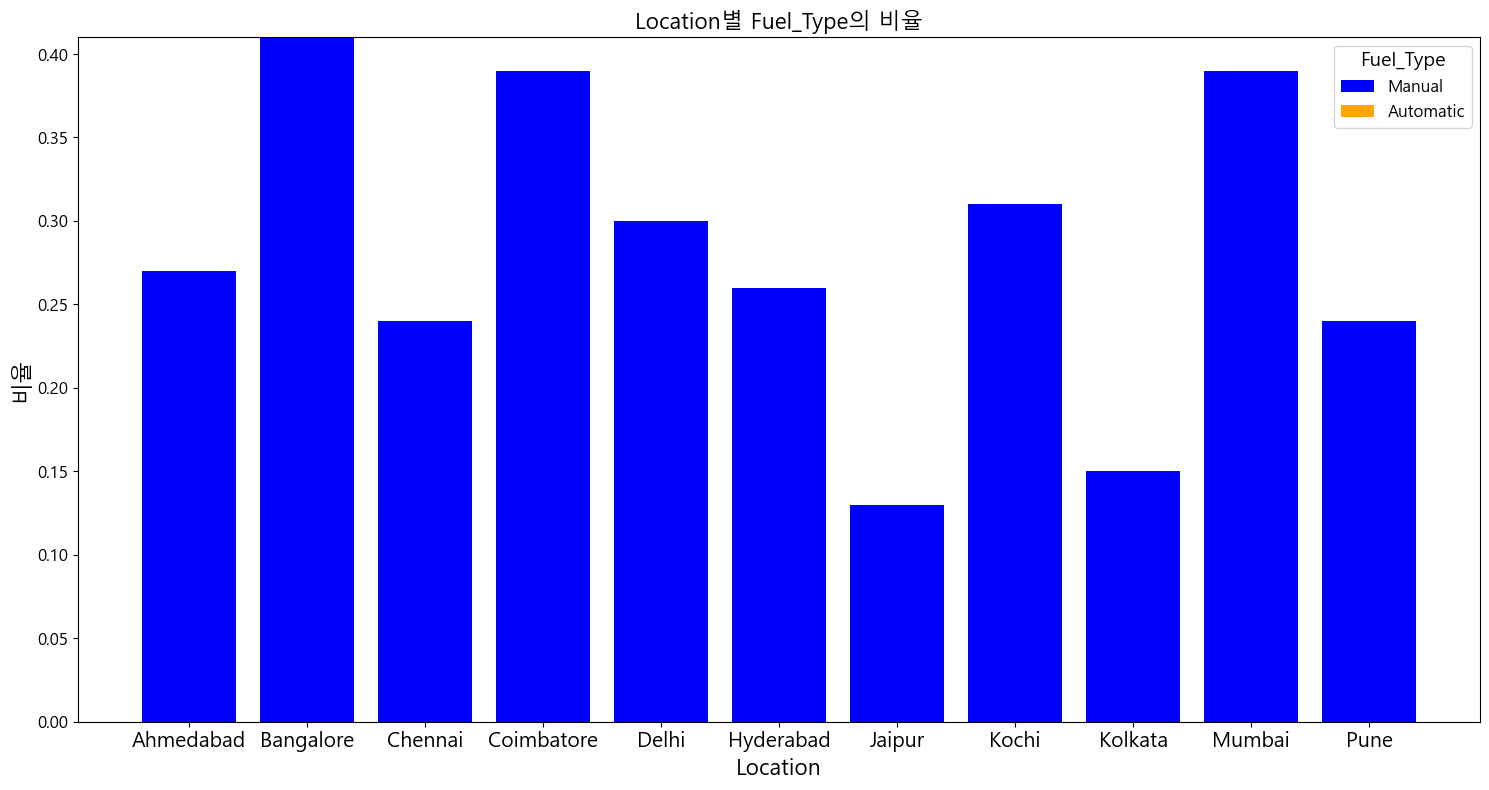

In [121]:
# 비율 2 삭제됨 수정 필요

df_cross1 = pd.crosstab(df['Location'], df['Transmission'])
df_cross1['sum'] = df_cross1.sum(axis = 1)

df_cross1['Manual'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['Automatic'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)


df_cross1[['Manual', 'Automatic']]
df_cross1
# 누적 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(15, 8))  # 더 넓은 그래프를 위한 크기 조정

# 막대 하단 위치 초기화
bottoms = [0] * len(df_cross1)
colors = ['blue', 'orange', 'green', 'red', 'purple']  # 5가지 색상으로 확장

# 각 비율을 누적 막대로 그리기
for i, column in enumerate(['Manual', 'Automatic']):
    ax.bar(df_cross1.index, df_cross1[column], bottom=bottoms, label=column, color=colors[i])
    bottoms = [b + h for b, h in zip(bottoms, df_cross1[column])]

# 그래프 설정
ax.set_xlabel('Location', fontsize=16)  # X축 라벨 크기 조정
ax.set_ylabel('비율', fontsize=16)       # Y축 라벨 크기 조정
ax.set_title('Location별 Fuel_Type의 비율', fontsize=16)  # 제목 크기 조정
ax.legend(title='Fuel_Type', fontsize=12, title_fontsize=14)  # 범례 제목 및 크기 조정

# 눈금 레이블 크기 조정
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=12)

# 레이아웃 최적화
plt.tight_layout()
plt.show()



In [123]:
crosstab

Fuel_Type,Diesel,Others
Location,,
Ahmedabad,0.023302,0.014213
Bangalore,0.036027,0.022476
Chennai,0.048256,0.032557
Coimbatore,0.061147,0.047265
Delhi,0.051727,0.041481
Hyderabad,0.083953,0.037019
Jaipur,0.038506,0.029747
Kochi,0.051066,0.059329
Kolkata,0.043133,0.046108


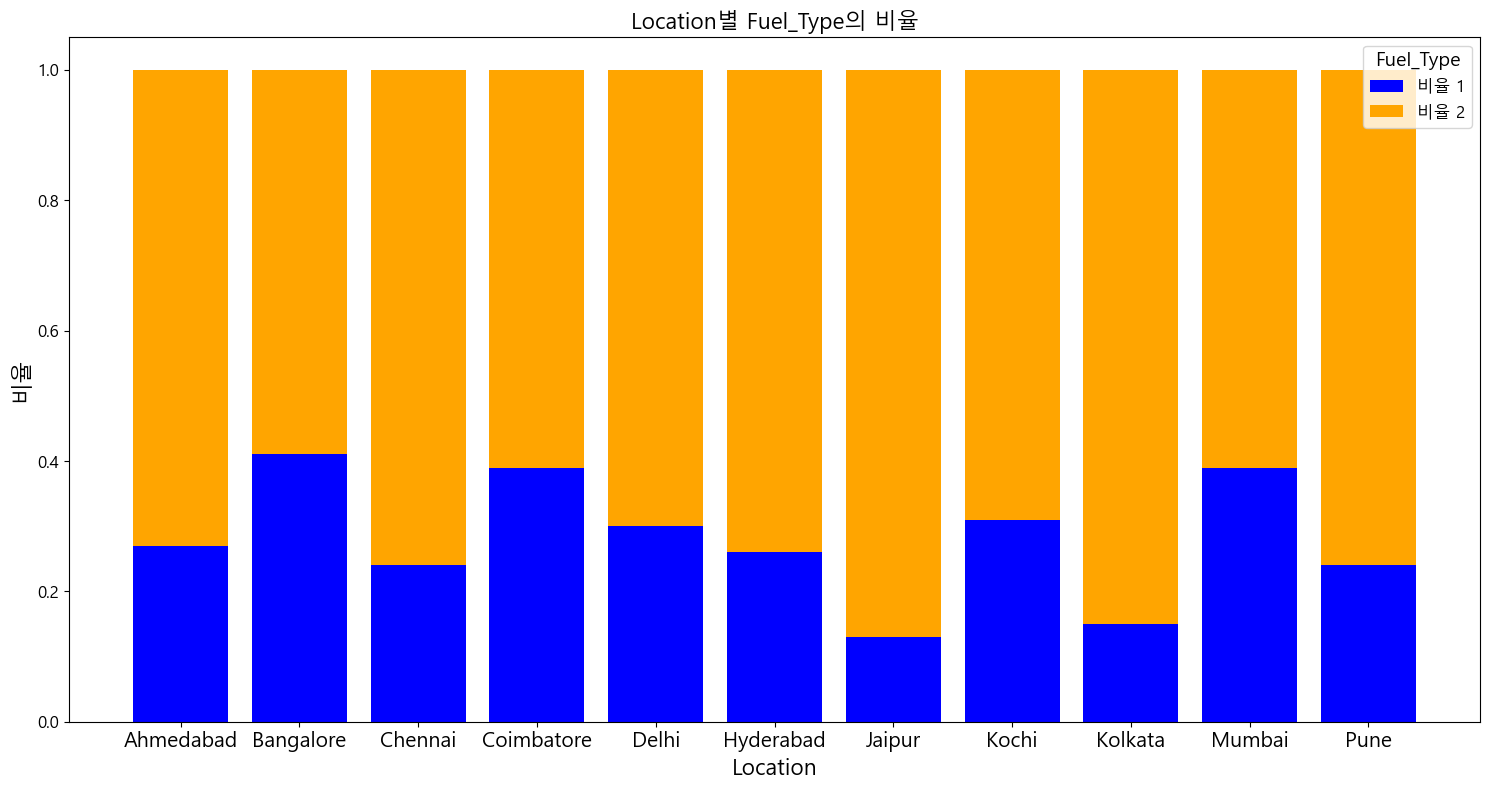

In [133]:
# 비율 2 삭제됨 수정 필요

df_cross1 = pd.crosstab(df['Location'], df['Transmission'])
df_cross1['sum'] = df_cross1.sum(axis = 1)

df_cross1['비율 1'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['비율 2'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)


df_cross1[['비율 1', '비율 2']]
df_cross1
# 누적 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(15, 8))  # 더 넓은 그래프를 위한 크기 조정

# 막대 하단 위치 초기화
bottoms = [0] * len(df_cross1)
colors = ['blue', 'orange', 'green', 'red', 'purple']  # 5가지 색상으로 확장

# 각 비율을 누적 막대로 그리기
for i, column in enumerate(['비율 1', '비율 2']):
    ax.bar(df_cross1.index, df_cross1[column], bottom=bottoms, label=column, color=colors[i])
    bottoms = [b + h for b, h in zip(bottoms, df_cross1[column])]

# 그래프 설정
ax.set_xlabel('Location', fontsize=16)  # X축 라벨 크기 조정
ax.set_ylabel('비율', fontsize=16)       # Y축 라벨 크기 조정
ax.set_title('Location별 Fuel_Type의 비율', fontsize=16)  # 제목 크기 조정
ax.legend(title='Fuel_Type', fontsize=12, title_fontsize=14)  # 범례 제목 및 크기 조정

# 눈금 레이블 크기 조정
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=12)

# 레이아웃 최적화
plt.tight_layout()
plt.show()



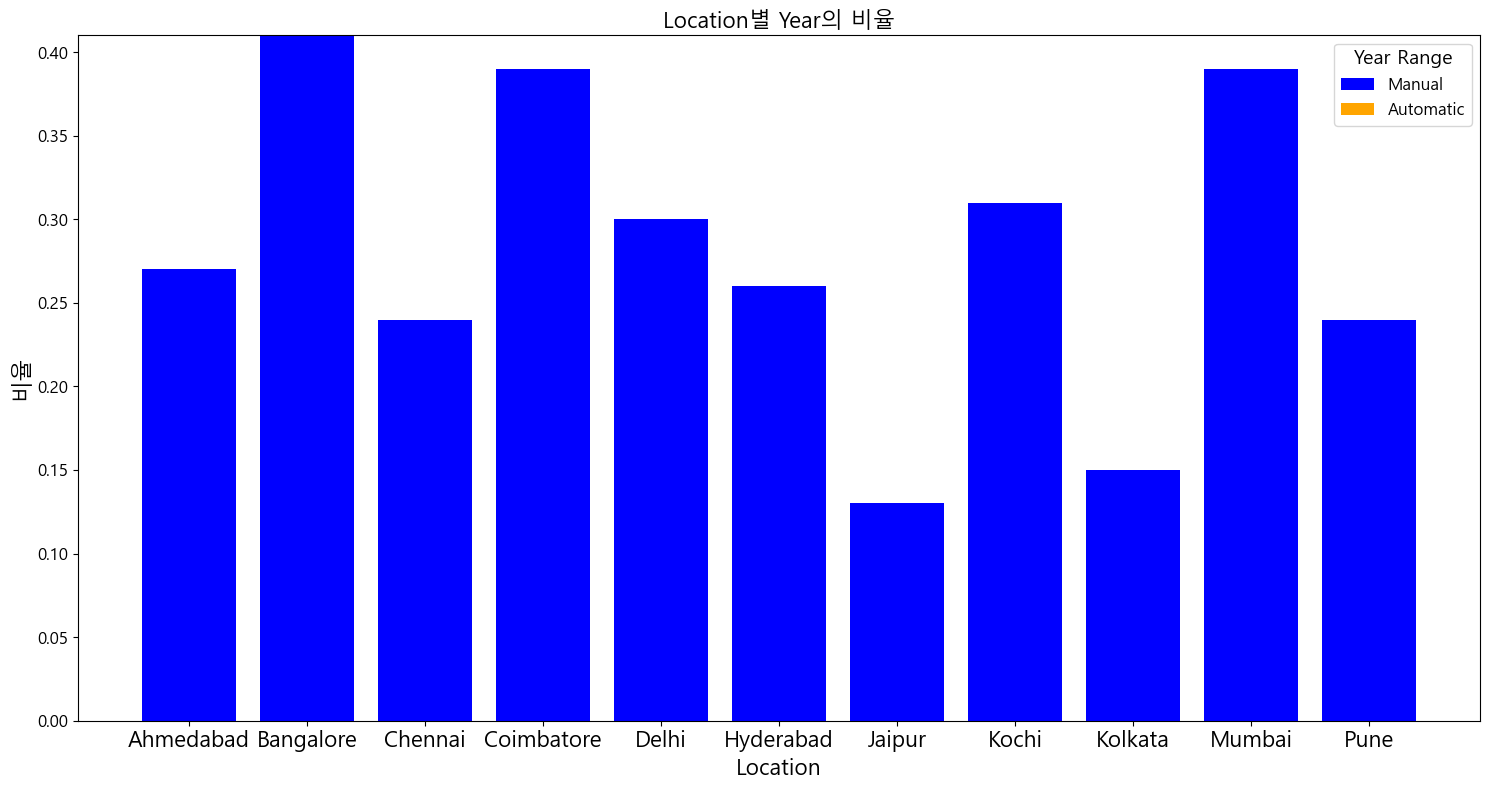

In [139]:
df_cross1 = pd.crosstab(df['Location'], df['Transmission'])
df_cross1['sum'] = df_cross1.sum(axis = 1)

df_cross1['Manual'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['Automatic'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)


df_cross1[['Manual', 'Automatic']]
df_cross1
# 누적 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(15, 8))  # 더 넓은 그래프를 위한 크기 조정

# 막대 하단 위치 초기화
bottoms = [0] * len(df_cross1)
colors = ['blue', 'orange', 'green', 'red', 'purple']  # 5가지 색상으로 확장

# 각 비율을 누적 막대로 그리기
for i, column in enumerate(['Manual', 'Automatic']):
    ax.bar(df_cross1.index, df_cross1[column], bottom=bottoms, label=column, color=colors[i])
    bottoms = [b + h for b, h in zip(bottoms, df_cross1[column])]

# 그래프 설정
ax.set_xlabel('Location', fontsize=16)  # X축 라벨 크기 조정
ax.set_ylabel('비율', fontsize=16)       # Y축 라벨 크기 조정
ax.set_title('Location별 Year의 비율', fontsize=16)  # 제목 크기 조정
ax.legend(title='Year Range', fontsize=12, title_fontsize=14)  # 범례 제목 및 크기 조정

# 눈금 레이블 크기 조정
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=12)

# 레이아웃 최적화
plt.tight_layout()
plt.show()

In [21]:
df['Owner_Type']

0       First
1       First
2       First
3       First
4       Other
        ...  
6046    First
6047    First
6048    First
6049    First
6050    First
Name: Owner_Type, Length: 6051, dtype: object

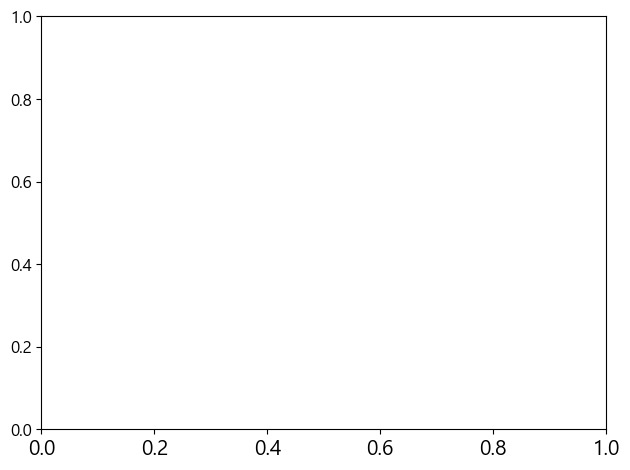

In [131]:
df_cross1 = pd.crosstab(df['Location'], df['Owner_Type'])
df_cross1['sum'] = df_cross1.sum(axis = 1)

df_cross1['First'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['Other'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)

df_cross1[['First', 'Other']]
df_cross1

# 막대 하단 위치 초기화
bottoms = [0] * len(df_cross1)
colors = ['blue', 'orange', 'green', 'red', 'purple']  # 5가지 색상으로 확장

# 각 비율을 누적 막대로 그리기
for i, column in enumerate(['First', 'Other']):
    ax.bar(df_cross1.index, df_cross1[column], bottom=bottoms, label=column, color=colors[i])
    bottoms = [b + h for b, h in zip(bottoms, df_cross1[column])]

# 그래프 설정
ax.set_xlabel('Location', fontsize=16)  # X축 라벨 크기 조정
ax.set_ylabel('비율', fontsize=16)       # Y축 라벨 크기 조정
ax.set_title('Location별 Fuel_Type의 비율', fontsize=16)  # 제목 크기 조정
ax.legend(title='Fuel_Type', fontsize=12, title_fontsize=14)  # 범례 제목 및 크기 조정

# 눈금 레이블 크기 조정
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=12)

# 레이아웃 최적화
plt.tight_layout()
plt.show()


In [23]:
df['Seats'].value_counts()

Seats
Others    5238
7          697
4          102
2           14
Name: count, dtype: int64

Seats          2     4     7  Others  sum  other
Location                                        
Ahmedabad   0.00  0.01  0.12     197  227   0.87
Bangalore   0.01  0.01  0.14     297  354   0.84
Chennai     0.00  0.01  0.10     433  489   0.89
Coimbatore  0.00  0.02  0.14     546  656   0.83
Delhi       0.01  0.02  0.16     461  564   0.82
Hyderabad   0.00  0.01  0.12     632  732   0.86
Jaipur      0.00  0.03  0.10     361  413   0.87
Kochi       0.00  0.02  0.10     581  668   0.87
Kolkata     0.01  0.01  0.06     498  540   0.92
Mumbai      0.00  0.02  0.11     701  802   0.87
Pune        0.00  0.02  0.11     531  606   0.88


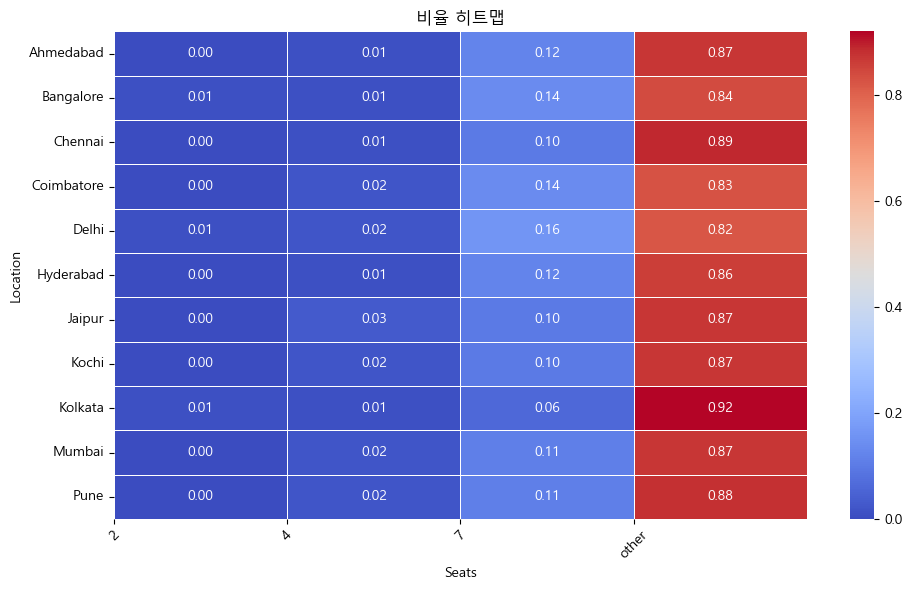

In [24]:
df_cross1 = pd.crosstab(df['Location'], df['Seats'])
df_cross1['sum'] = df_cross1.sum(axis = 1)
df_cross1['2'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['4'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)
df_cross1['7'] = round(df_cross1.iloc[:,2] / df_cross1['sum'],2)
df_cross1['other'] = round(df_cross1.iloc[:,3] / df_cross1['sum'],2)
# df_cross1['비율 5'] = round(df_cross1.iloc[:,4] / df_cross1['sum'],2)

df_cross1[['2', '4', '7', 'other']]
print(df_cross1)

# 비율 열만 선택
heatmap_data = df_cross1[['2', '4', '7', 'other']]

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('비율 히트맵')
plt.xlabel('Seats')
plt.ylabel('Location')
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=heatmap_data.columns, rotation=45)
plt.tight_layout()
plt.show()

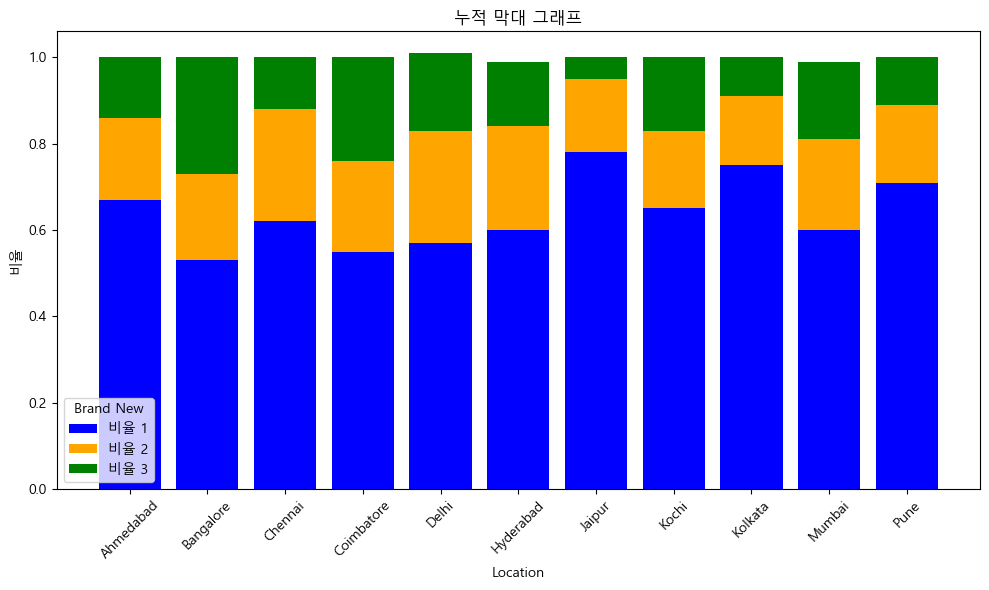

In [26]:
df_cross1 = pd.crosstab(df['Location'], df['Brand_new'])
df_cross1['sum'] = df_cross1.sum(axis = 1)
df_cross1['비율 1'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['비율 2'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)
df_cross1['비율 3'] = round(df_cross1.iloc[:,2] / df_cross1['sum'],2)
# df_cross1['비율 4'] = round(df_cross1.iloc[:,3] / df_cross1['sum'],2)
# df_cross1['비율 5'] = round(df_cross1.iloc[:,4] / df_cross1['sum'],2)

df_cross1[['비율 1', '비율 2']]
df_cross1

# 누적 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 누적 막대 그래프를 그리기 위해 데이터를 준비
bottoms = [0] * len(df_cross1)  # 각 막대의 하단 위치를 저장할 리스트
colors = ['blue', 'orange', 'green']  # 비율 열에 대한 색상

for i, column in enumerate(['비율 1', '비율 2', '비율 3']):
    ax.bar(df_cross1.index, df_cross1[column], bottom=bottoms, label=column, color=colors[i])
    bottoms = [b + h for b, h in zip(bottoms, df_cross1[column])]  # 누적 높이 업데이트

# 그래프 설정
ax.set_xlabel('Location')
ax.set_ylabel('비율')
ax.set_title('누적 막대 그래프')
ax.legend(title='Brand New')

# 그래프 출력
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

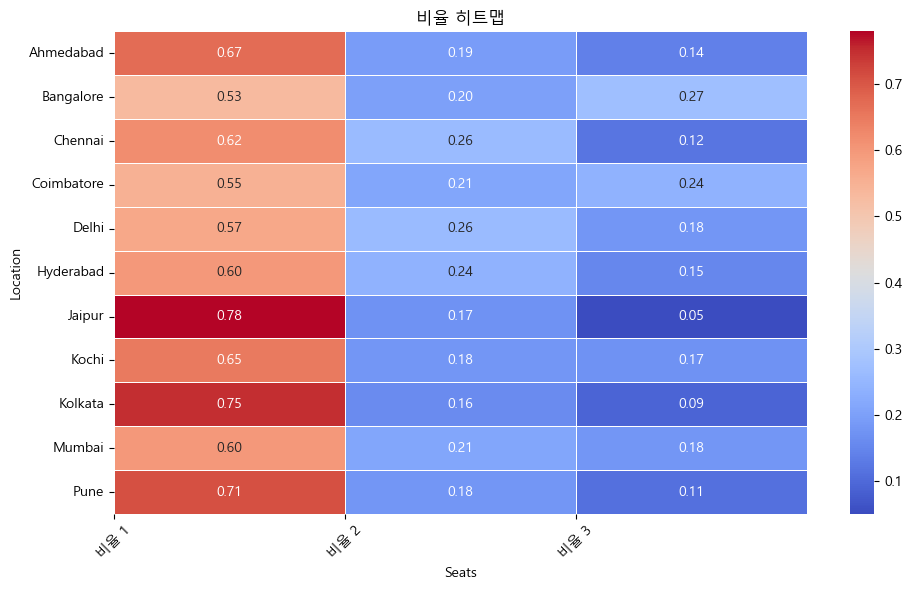

In [69]:
df_cross1 = pd.crosstab(df['Location'], df['Brand_new'])
df_cross1['sum'] = df_cross1.sum(axis = 1)
df_cross1['비율 1'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['비율 2'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)
df_cross1['비율 3'] = round(df_cross1.iloc[:,2] / df_cross1['sum'],2)
# df_cross1['비율 4'] = round(df_cross1.iloc[:,3] / df_cross1['sum'],2)
# df_cross1['비율 5'] = round(df_cross1.iloc[:,4] / df_cross1['sum'],2)

df_cross1[['비율 1', '비율 2']]
df_cross1

# 비율 열만 선택
heatmap_data = df_cross1[['비율 1', '비율 2', '비율 3' ]]

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('비율 히트맵')
plt.xlabel('Seats')
plt.ylabel('Location')
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=heatmap_data.columns, rotation=45)
plt.tight_layout()
plt.show()

In [29]:
df['Brand_new'].value_counts()

Brand_new
1    3837
2    1256
3     958
Name: count, dtype: int64

Brand_new     1    2    3  sum     1     2     3
Location                                        
Ahmedabad   152   43   32  227  0.67  0.19  0.14
Bangalore   186   71   97  354  0.53  0.20  0.27
Chennai     302  127   60  489  0.62  0.26  0.12
Coimbatore  363  136  157  656  0.55  0.21  0.24
Delhi       320  144  100  564  0.57  0.26  0.18
Hyderabad   441  179  112  732  0.60  0.24  0.15
Jaipur      322   69   22  413  0.78  0.17  0.05
Kochi       435  120  113  668  0.65  0.18  0.17
Kolkata     404   85   51  540  0.75  0.16  0.09
Mumbai      483  171  148  802  0.60  0.21  0.18
Pune        429  111   66  606  0.71  0.18  0.11


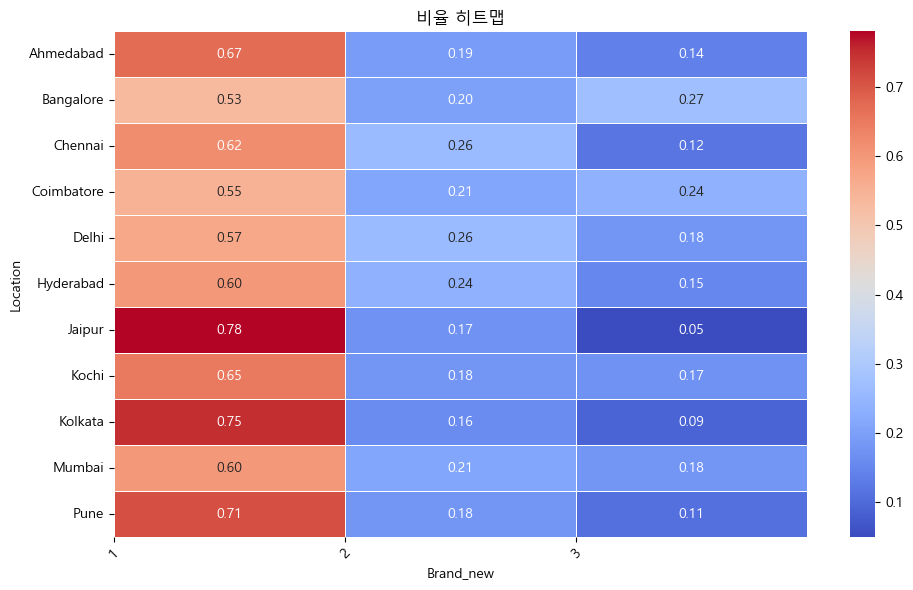

In [30]:
df_cross1 = pd.crosstab(df['Location'], df['Brand_new'])
df_cross1['sum'] = df_cross1.sum(axis = 1)
df_cross1['1'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['2'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)
df_cross1['3'] = round(df_cross1.iloc[:,2] / df_cross1['sum'],2)
# df_cross1['비율 4'] = round(df_cross1.iloc[:,3] / df_cross1['sum'],2)
# df_cross1['비율 5'] = round(df_cross1.iloc[:,4] / df_cross1['sum'],2)

df_cross1[['1', '2', '3']]
print(df_cross1)

# 비율 열만 선택
heatmap_data =df_cross1[['1', '2', '3']]


# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('비율 히트맵')
plt.xlabel('Brand_new')
plt.ylabel('Location')
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=heatmap_data.columns, rotation=45)
plt.tight_layout()
plt.show()

In [31]:
df_cross1 = pd.crosstab(df['Location'], df['location_label'])
df_cross1['sum'] = df_cross1.sum(axis = 1)
df_cross1['비율 1'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['비율 2'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)
df_cross1['비율 3'] = round(df_cross1.iloc[:,2] / df_cross1['sum'],2)
# df_cross1['비율 4'] = round(df_cross1.iloc[:,3] / df_cross1['sum'],2)
# df_cross1['비율 5'] = round(df_cross1.iloc[:,4] / df_cross1['sum'],2)

df_cross1[['비율 1', '비율 2']]
df_cross1

location_label,location_big,location_small,sum,비율 1,비율 2,비율 3
Location,,,,,,
Ahmedabad,227,0,227,1.0,0.0,1.0
Bangalore,354,0,354,1.0,0.0,1.0
Chennai,0,489,489,0.0,1.0,1.0
Coimbatore,656,0,656,1.0,0.0,1.0
Delhi,564,0,564,1.0,0.0,1.0
Hyderabad,732,0,732,1.0,0.0,1.0
Jaipur,0,413,413,0.0,1.0,1.0
Kochi,668,0,668,1.0,0.0,1.0
Kolkata,0,540,540,0.0,1.0,1.0
